<center><p float="center">
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10> Generative AI for NLP Program</center></font></h1>
<h1><center> Project </center></h1>

# **GA-NLP Mid-Term Project: Financial Product Complaint Classification and Summarization**

## **Business Context**

### **Description**
*In the modern financial industry, customer complaints play a crucial role in identifying areas where financial institutions can improve their services. Effectively categorizing these complaints into specific product categories, such as credit reports, student loans, or money transfers, is essential for addressing customer concerns promptly by routing the tickets to relevant personnel. Leveraging Generative AI for text classification can help financial institutions better understand customer grievances and respond more efficiently. Apart from this, a summary of the customer complaint helps the support personnel quickly grasp the gist of the grievance*

### **Objective**
*The primary goal of this project is to utilize Generative AI techniques to improve the classification and summarization of customer complaints in the financial sector.
Specifically, the project will focus on:*

1. **Text-to-Label Classification:** *Implementing Zero-shot and Few-shot prompting methods to accurately classify customer complaints into relevant product categories.*
2. **Text-to-Text Summarization:** *Using Zero-shot prompting to generate concise summaries of customer complaints, enabling more personalized and effective responses.*

### **Conclusion**
*Upon completing this project, you will have the capability to develop end-to-end applications for LLM-based text classification and summarization. These tools will enable financial institutions to automate the complaint handling process, leading to faster, more accurate responses to customer issues, improved customer satisfaction, and enhanced compliance with industry regulations. This project will also provide you with valuable skills and experience that can be applied to a range of real-world business challenges.*


# **Section 1 : Setting Up for Prompt Engineering with Mistral Model**

### **Install & Importing neccessary libraries**

In [ ]:
# This part of code will skip all the un-necessary warnings which can occur during the execution of this project.
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [ ]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.28 --no-cache-dir --verbose
# For downloading the models from HF Hub
!pip install huggingface_hub==0.23.2 -q

Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 76.2 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Non-user install by explicit request
  Created build tracker: /tmp/pip-build-tracker-tjcatuug
  Entered build tracker: /tmp/pip-build-tracker-tjcatuug
  Created temporary directory: /tmp/pip-install-82dx_8hd
  Created temporary directory: /tmp/pip-ephem-wheel-cache-jnjmnkoe
  1 location(s) to search for versions of scikit-build-core:
  * https://pypi.org/simple/scikit-build-core/
  Fetching project page and analyzing links: https://pypi.org/simple/scikit-build-core/
  Getting page https://pypi.org/simple/scikit-build-core/
  Found index url https://pypi.org/simple/
  Looking up "https://pypi.org/simple/scikit-build-core/" in the cache
  Request header has "max_age" as 0, cache bypassed

In [ ]:
#download datasets evaluate rouge_score and bert score
!pip install -q datasets==3.0.0 evaluate==0.4.3 bert-score==0.3.13

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
!pip install numpy==1.25.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 22.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.25.2 which is incompatible.


> ***If prompted, restart the session. After restarting, you can continue executing the notebook from where you left off without needing to start from the beginning. Starting over might cause you to get stuck in a loop.***



In [ ]:
!pip freeze > requirement.txt

In [ ]:
# Basic Imports for Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import pandas as pd
import numpy as np
from tqdm import tqdm
import json
import re

import torch
import evaluate

# from google.colab import drive
import locale

### **Question 1: Importing Libaries and Mistral Model (3 Marks)**

- For the Mistral Model name or path and model basename, refer to the **Week 3 Additional Content: Prompt Engineering Fundamentals**
- Code Notebook: Self-Consistency and Tree-of-Thought Prompting with Llama 2 and Mistral.





https://huggingface.co/TheBloke/Mistral-7B-Instruct-v0.2-GGUF/blob/main/mistral-7b-instruct-v0.2.Q5_K_M.gguf

In [ ]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

In [ ]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_basename = "llama-2-13b-chat.Q5_K_M.gguf" # the model is in gguf format

In [ ]:
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
    )

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.Q5_K_M.gguf:   0%|          | 0.00/9.23G [00:00<?, ?B/s]

In [ ]:
lcpp_llm = Llama(
        model_path=model_path,
        n_threads=2,  # CPU cores
        n_batch=512,  # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
        n_gpu_layers=40,  # Change this value based on your model and your GPU VRAM pool.
        n_ctx=4096,  # Context window
    )

AVX = 1 | AVX_VNNI = 0 | AVX2 = 1 | AVX512 = 1 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


# **Section 2: Text to Label generation**

### **Question 2: Zero-Shot Prompting for Text Classification (5 Marks)**

##### **Q2.1: Define the Prompt Template, System Message, generate_prompt** **(2 Marks)**

- Define a **system message** as a string and assign it to the variable system_message to generate product class.
- Create a **zero shot prompt template** that incorporates the system message and user input.
- Define **generate_prompt** function that takes both the system_message and user_input as arguments and formats them into a prompt template


Write a Python function called **generate_mistral_response** that takes a single parameter, narrative, which represents the user's complain. Inside the function, you should perform the following tasks:


- **Combine the system_message and narrative to create a prompt string using generate_prompt function.**

*Generate a response from the Mistral model using the lcpp_llm instance with the following parameters:*

- prompt should be the combined prompt string.
- max_tokens should be set to 1200.
- temperature should be set to 0.
- top_p should be set to 0.95.
- repeat_penalty should be set to 1.2.
- top_k should be set to 50.
- stop should be set as a list containing '/s'.
- echo should be set to False.
Extract and return the response text from the generated response.

Don't forget to provide a value for the system_message variable before using it in the function.

In [ ]:
# system_message = """ You are an AI trained to Classify Customer Complaints in the Financial sector.
# Given a text describing a customer's complaint, your task is to determine the most appropriate Single Finance Product Class that the Whole Customer Complaint pertains to from the list of Finance Products - 'credit_card', 'retail_banking', 'credit_reporting', 'mortgages_and_loans', 'debt_collection'.

# Here is the Financial Cstomer Complaint you need to Carefully Classify:
# "{narrative}"

# Output:
# The Financial Product associated with this Complaint is: {Output Financial Product}
# """

# system_message = """ You are an AI trained to Classify Customer Complaints in the Financial sector.
# Given a text describing a customer's complaint, your task is to determine the most appropriate Single Finance Product Class that the Whole Customer Complaint
# pertains to from the list of Finance Products - 'credit_card', 'retail_banking', 'credit_reporting', 'mortgages_and_loans', 'debt_collection'.

# Here is the Financial Customer Complaint you need to Carefully Classify:
# "{narrative}"

# Please Return ONLY the Output of Finance Product Class in SINGLE WORD as below With No Other Text, No Details and No Explanation.
# {Output Financial Product}
# """

### 1. Few-Shot Approach Prompt

system_message = """ You are an AI trained to Classify Customer Complaints in the Financial sector.
Given a text describing a Customer's Complaint, your task is to determine most Accurately a Single Finance Product Class that the Whole Customer Complaint
pertains to basing this list of Finance Products - 'credit_card', 'retail_banking', 'credit_reporting', 'mortgages_and_loans', 'debt_collection'.

Here is the Financial Customer Complaint you need to Carefully Determine:
"{narrative}"

Please Do Not give Any Response Other than the Finance 'Product Class', Do Not Output Any Other Details or Explanation.

"""
# Please Output ONLY the Finance Product Class in SINGLE WORD With No Other Text, No Details and No Explanation.


In [ ]:
zero_shot_prompt_template = """<s>[INST]<<SYS>> {system_message} <</SYS>> {user_message} [/INST]"""

In [ ]:
def generate_prompt(system_message,user_input):
    prompt = zero_shot_prompt_template.format(system_message=system_message,user_message=user_input)
    return prompt

In [ ]:
def generate_mistral_response(input_text):

    # Combine user_prompt and system_message to create the prompt
    prompt = generate_prompt(system_message,input_text)

    # Define the Llama model along with its parameters for generating a response
    response = lcpp_llm(prompt=prompt,
                        max_tokens=1200,
                        temperature=0,
                        top_p=0.95,
                        repeat_penalty=1.2,
                        top_k=50,
                        stop=["/s"],
                        echo=False)

    # Extract and return the response text
    response_text = response["choices"][0]["text"]

    # print('HuggingFace LLama-2-13B Response Zero Shot: ++++++++++++++++++++++++++')
    # print(response_text)

    return response_text

In [ ]:
# system_message = """ You are an AI trained to Classify Customer Complaints in the Financial sector and Return ONLY the Finance Product Class.
# Given a text describing a customer's complaint, your task is to Determine the most appropriate Single Finance Product Class that the Whole Customer Complaint
# pertains to from this list of Finance Products - 'credit_card', 'retail_banking', 'credit_reporting', 'mortgages_and_loans', 'debt_collection'.

# Here is the Financial Customer Complaint you need to Carefully Classify:
# "{narrative}"

# Please Remember to Output ONLY the Finance Product Class in SINGLE WORD With No EXTRA Text, No Details and No Explanation.
# """

test_narrative = r'purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded subtotal shipping tax total usd visa ending refund called disputed amount stated nothing needed submitted address issue recharged item removing called back dispute amount transaction rebillmerchandiserobert ca purchased thu posted wed purchased appears statement transaction rebill ca u followed see status case submitted documentation showing canceled order supposed submit refund called back speak manager case stated dispute ruled favor charge removed card capital one removed purchase bill purchase adjustmentmerchandiserobert j posted fri purchased appears statement purchase adjustment capital one recharges amount transaction rebillmerchandiserobert j purchased thu posted mon purchased appears statement transaction rebill called capital one requested recharge stated visa ruled case pretended remove purchase knew anything case manager ruling favor'
# test_narrative = r'current loan got deferment paid back credit history yet lost job due covid therefore asking original bank ally lower rate allow lower payment every bank offering applied full page document today still reply called time portal representative tell use work call get told need one piece documentation time refuse allow speak even email underwriter yet applying original mortgage one dedicated rep could communicate rep told yes document would word within day waited till called told go website told work read underwriter note documentation old would start'
test_response = generate_mistral_response(test_narrative)
print('+'*00)
test_response

'  Based on the customer complaint provided, the most accurate Finance Product Class that pertains to the issue is:\n\ncredit_card'

**Refer the below reference image to upload a dataset file in the google colab.**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

![1_eLs1D3BI4_HLAabN5WUTPg[1].png](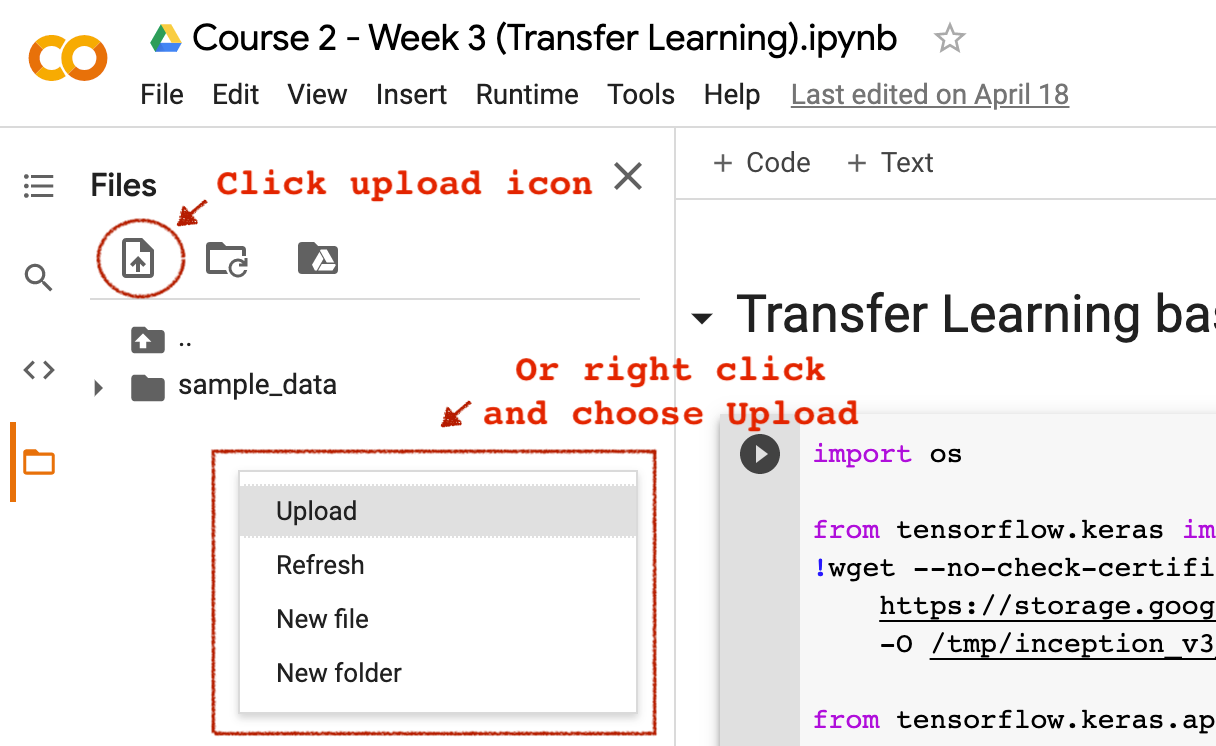)

In [ ]:
# Load a CSV File containing Dataset of 500 products, narrative and summary (summary of narrative)
# dataFilename = r'/content/drive/MyDrive/1_GreatLearning_Gen-AI_With_NLP/2_Module_2/Week_6/Complains_classification.csv'
dataFilename = r'/content/Complains_classification.csv'

data = pd.read_csv(dataFilename)
print('Data Shape: ', data.shape)
data.head()

Data Shape:  (500, 3)


,product,narrative,summary
0,credit_card,purchase order day shipping amount receive pro...,The customer made a purchase order with an agr...
1,credit_card,forwarded message date tue subject please inve...,The sender of the email believes they have bee...
2,retail_banking,forwarded message cc sent friday pdt subject f...,The sender of the email alleges that Wells Far...
3,credit_reporting,payment history missing credit report speciali...,The credit report from Specialized Loan Servic...
4,credit_reporting,payment history missing credit report made mis...,The text concerns a person who found an unauth...


**Due to limited GPU resources, we will test our model with zero prompts on only 50 examples instead of the entire dataset.**

In [ ]:
# Randomly select 50 rows
# new_data = data.sample(n=50, random_state=40)
new_data = data.sample(n=25, random_state=40)

print('New Data Shape: ', new_data.shape)
new_data.head()

New Data Shape:  (25, 3)


,product,narrative,summary
167,retail_banking,fraudulent charge totaling made capital one ch...,A fraudulent charge was made on the individual...
169,credit_reporting,block except otherwise provided section consum...,The text outlines various stipulations regardi...
461,credit_card,usaa master plan collect cancellation debt usa...,The input appears to be a complaint about USAA...
253,credit_reporting,block except otherwise provided section consum...,The text pertains to the stipulations and oper...
42,credit_reporting,open account acct opened balance account acct ...,The input is about various accounts being open...


##### **Q2.2: Create a new column in the DataFrame called 'mistral_response' and populate it with responses generated by applying the 'generate_mistral_response' function to each 'narrative' in the DataFrame and prepare the mistral_response_cleaned column using extract_category function** **(1 Marks)**

In [ ]:
# example - new_data['mistral_response'] = new_data['narrative'].apply(lambda x:______ )
print('New Data Shape: ', new_data.shape)

new_data['mistral_response'] = new_data['narrative'].apply(lambda x: generate_mistral_response(x))
print('New Data Shape: ', new_data.shape)
new_data.head()

New Data Shape:  (25, 3)


Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


New Data Shape:  (25, 4)


,product,narrative,summary,mistral_response
167,retail_banking,fraudulent charge totaling made capital one ch...,A fraudulent charge was made on the individual...,"Based on the information provided, the most ..."
169,credit_reporting,block except otherwise provided section consum...,The text outlines various stipulations regardi...,"Based on the text you provided, the most acc..."
461,credit_card,usaa master plan collect cancellation debt usa...,The input appears to be a complaint about USAA...,"Based on the information provided, the most ..."
253,credit_reporting,block except otherwise provided section consum...,The text pertains to the stipulations and oper...,"Based on the text you provided, the most acc..."
42,credit_reporting,open account acct opened balance account acct ...,The input is about various accounts being open...,"Sure, I'd be happy to help! Based on the tex..."


In [ ]:
new_data['mistral_response']

,mistral_response
167,"Based on the information provided, the most ..."
169,"Based on the text you provided, the most acc..."
461,"Based on the information provided, the most ..."
253,"Based on the text you provided, the most acc..."
42,"Sure, I'd be happy to help! Based on the tex..."
369,"Sure, I'm ready to help! Here is my response..."
26,"Sure, I'd be happy to help! Based on the inf..."
377,"Sure, I'm ready to help! Here is my response..."
238,"Sure, I'm ready to help! Here is my response..."
374,"Sure, I'm ready to help! Here is my response..."


In [ ]:
def extract_category(text):
    # Define the regex pattern to match "category:" or "Category:" followed by a word
    pattern = r'category:\s*(\w+)'  # The pattern itself remains the same

    # Use re.search with the re.IGNORECASE flag to make it case-insensitive
    match = re.search(pattern, text, re.IGNORECASE)

    # If a match is found, return the captured group, else return None
    if match:
        return match.group(1)
    else:
        # pattern1 = r'(credit_card|retail_banking|credit_reporting|mortgages_and_loans|debt_collection)'
        pattern1 = r'(credit_card|credit card|retail_banking|retail banking|credit_reporting|credit reporting|mortgages_and_loans|mortgages and loans|mortgage|debt_collection|debt collection)'

        match = re.search(pattern1, text, re.IGNORECASE)
        if match:
            return match.group()
        else:
            return ''

In [ ]:
print('New Data Shape: ', new_data.shape)

# example - new_data['mistral_response_cleaned'] = new_data['narrative'].apply(lambda x:______ )
new_data['mistral_response_cleaned'] = new_data['mistral_response'].apply(lambda x: extract_category(x))

print('New Data Shape: ', new_data.shape)
new_data.head()

New Data Shape:  (25, 4)
New Data Shape:  (25, 5)


,product,narrative,summary,mistral_response,mistral_response_cleaned
167,retail_banking,fraudulent charge totaling made capital one ch...,A fraudulent charge was made on the individual...,"Based on the information provided, the most ...",credit_card
169,credit_reporting,block except otherwise provided section consum...,The text outlines various stipulations regardi...,"Based on the text you provided, the most acc...",credit_reporting
461,credit_card,usaa master plan collect cancellation debt usa...,The input appears to be a complaint about USAA...,"Based on the information provided, the most ...",credit_reporting
253,credit_reporting,block except otherwise provided section consum...,The text pertains to the stipulations and oper...,"Based on the text you provided, the most acc...",credit_reporting
42,credit_reporting,open account acct opened balance account acct ...,The input is about various accounts being open...,"Sure, I'd be happy to help! Based on the tex...",credit_reporting


In [ ]:
new_data['product'] = new_data['product'].str.replace('_', ' ').str.lower()
new_data['mistral_response_cleaned'] = new_data['mistral_response_cleaned'].str.replace('_', ' ').str.lower()

new_data.head()

,product,narrative,summary,mistral_response,mistral_response_cleaned
167,retail banking,fraudulent charge totaling made capital one ch...,A fraudulent charge was made on the individual...,"Based on the information provided, the most ...",credit card
169,credit reporting,block except otherwise provided section consum...,The text outlines various stipulations regardi...,"Based on the text you provided, the most acc...",credit reporting
461,credit card,usaa master plan collect cancellation debt usa...,The input appears to be a complaint about USAA...,"Based on the information provided, the most ...",credit reporting
253,credit reporting,block except otherwise provided section consum...,The text pertains to the stipulations and oper...,"Based on the text you provided, the most acc...",credit reporting
42,credit reporting,open account acct opened balance account acct ...,The input is about various accounts being open...,"Sure, I'd be happy to help! Based on the tex...",credit reporting


In [ ]:
new_data.to_csv('zeroShot_mistral_response_cleaned.csv', index=False)
print('File Created Succesfully!')

File Created Succesfully!


In [ ]:
print(new_data['mistral_response'].nunique())
print(new_data['mistral_response_cleaned'].nunique())

14
3


##### **Q2.3: Calculate the F1 score** **(1 Marks)**

In [ ]:
# Calculate F1 score for 'product' and 'mistral_response'
f1 =  f1_score(new_data['product'], new_data['mistral_response'],average='micro')

print(f'F1 Score: {f1}')

F1 Score: 0.0


In [ ]:
# Calculate F1 score for 'product' and 'mistral_response_cleaned'
f2 =  f1_score(new_data['product'], new_data['mistral_response_cleaned'], average='micro')
print(f'F1 Score: {f2}') # F1 Score: 0.54

F1 Score: 0.8399999999999999


##### **Q2.4: Explain the difference in F1 scores between mistral_response and mistral_response_cleaned.** **(1 Marks)**

In [ ]:
print("""Zero-Shot Approach - Difference in F1 scores between mistral_response and mistral_response_cleaned:
Recall is Zero when we consider the Model Response as is (which has some extra text from the Model Response than just the 'Product Class'),
so F1 Score is showing up as '0'.

After Cleaning the Response by Regex Pattern Search, F1 Score Improved to 0.52/0.54/0/85 (based on number of Samples considered) by considering
Only 'Product Class' returned from Pattern Search as the 'Predicted Value' for F1 score.

"""
)

Zero-Shot Approach - Difference in F1 scores between mistral_response and mistral_response_cleaned:
Recall is Zero when we consider the Model Response as is (which has some extra text from the Model Response than just the 'Product Class'),
so F1 Score is showing up as '0'.

After Cleaning the Response by Regex Pattern Search, F1 Score Improved to 0.52/0.54/0/85 (based on number of Samples considered) by considering
Only 'Product Class' returned from Pattern Search as the 'Predicted Value' for F1 score.




In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Transform the multiclass labels into a one-hot encoded format.
# Then compute the precision-recall curve for each class separately.

classes = new_data['product'].unique() # Get unique classes from 'product' column
y_true = label_binarize(new_data['product'].to_list(), classes=classes) # Binarize the 'product' column

y_pred = label_binarize(new_data['mistral_response'].to_list(), classes=classes) # Binarize the 'mistral_response_cleaned' column
# y_pred = label_binarize(new_data['mistral_response_cleaned'].to_list(), classes=classes) # Binarize the 'mistral_response_cleaned' column

# Calculate precision and recall for each class
precision = dict()
recall = dict()
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_true[:, i], y_pred[:, i])

# Print precision and recall for each class
for i in range(len(classes)):
    print(f'Precision & Recall For class {classes[i]}:')
    print(f'\t\t {precision[i]}, {recall[i]}')

Precision & Recall For class retail banking:
		 [0.04 1.  ], [1. 0.]
Precision & Recall For class credit reporting:
		 [0.68 1.  ], [1. 0.]
Precision & Recall For class credit card:
		 [0.16 1.  ], [1. 0.]
Precision & Recall For class mortgages and loans:
		 [0.12 1.  ], [1. 0.]


### **Question 3: Few-Shot Prompting for Text Classification (7 Marks)**

##### **Q3.1: Prepare examples for a few-shot prompt, formulate the prompt, and generate the Mistral response. (5 Marks)**

**Generate a set of gold examples by randomly selecting 10 instances of user_input and assistant_output from dataset ensuring a balanced representation with 2 examples from each class.**

In [ ]:

import json

review_1 = data[data['product'] == 'credit_card']
review_2 = data[data['product'] == 'retail_banking']
review_3 = data[data['product'] == 'credit_reporting']
review_4 = data[data['product'] == 'mortgages_and_loans']
review_5 = data[data['product'] == 'debt_collection']

# Sample 2 examples for each category; #<- ensures that gold examples are the same for every session by using 'random_state'
examples_1 = review_1.sample(2, random_state=40)
examples_2 = review_2.sample(2, random_state=40)
examples_3 = review_3.sample(5, random_state=40)
examples_4 = review_4.sample(2, random_state=40)
examples_5 = review_5.sample(2, random_state=40)

# Concatenate examples for few shot prompting
examples_df = pd.concat([examples_1,examples_2,examples_3,examples_4,examples_5 ])

# Create the training set by excluding examples
gold_examples_df = data.drop(index=examples_df.index)

# Convert examples to JSON
columns_to_select = ['narrative', 'product']
examples_json = examples_df[columns_to_select].to_json(orient='records')

# Print the first record from the JSON
print(json.loads(examples_json)[0])

# Print the shapes of the datasets
print("Examples Set Shape:", examples_df.shape)
print("Gold Examples Shape:", gold_examples_df.shape)

{'narrative': 'called request new york state covid relief plan day interest fee waived amex provided relief leading late payment amex refused honor relief day gap insists charging late fee', 'product': 'credit_card'}
Examples Set Shape: (13, 3)
Gold Examples Shape: (487, 3)


- Define your **system_message**.
- Define **first_turn_template**, **example_template** and **prediction template**
- **create few shot prompt** using gold examples and system_message
- Randomly select 50 rows from test_df as test_data
- Create **mistral_response** with **mistral_response_cleaned** columns for this

In [ ]:
# ### 1. Zero-Shot Approach Prompt
# system_message = """ You are an AI trained to Classify Customer Complaints in the Financial sector.
# Given a text describing a Customer's Complaint, your task is to determine most Accurately a Single Finance Product Class that the Whole Customer Complaint
# pertains to basing this list of Finance Products - 'credit_card', 'retail_banking', 'credit_reporting', 'mortgages_and_loans', 'debt_collection'.

# Here is the Financial Customer Complaint you need to Carefully Determine:
# "{narrative}"

# Please Do Not give Any Response Other than the Finance 'Product Class', Do Not Output Any Other Details or Explanation.
# """

### 2. Few-Shot Approach Prompt
system_message = """ You are an AI trained to Classify Customer Complaints in the Financial sector and Return Correct Finance Product Class in a Single Phrase.
Do not explain your answer.

Given a text describing a Customer's Complaint, your task is to Carefully read the text of the Customer Complaint and determine
the most Accurate Single Finance Product Class that the Whole Customer Complaint belongs to using the list of Finance Product Classes -
'credit_card', 'retail_banking', 'credit_reporting', 'mortgages_and_loans', 'debt_collection'.

Here is the Financial Customer Complaint you need to Carefully Classify:
"{narrative}"

To reiterate, your answer should strictly contain ONLY a SINGLE PHRASE with One of the Correct Finance Product Class:
'credit_card', 'retail_banking', 'credit_reporting', 'mortgages_and_loans', 'debt_collection'.

"""
# system_message = """ You are an AI trained to Classify Customer Complaints in the Financial sector.
# Given a text describing a Customer's Complaint, your task is to determine most Accurately a Single Finance Product Class that the Whole Customer Complaint
# pertains to basing this list of Finance Products - 'credit_card', 'retail_banking', 'credit_reporting', 'mortgages_and_loans', 'debt_collection'.

# Here is the Financial Customer Complaint you need to Carefully Determine:
# "{narrative}"

# Do not explain your answer. Your answer should only contain the Classified Finance 'Product Class'.
# """
# system_message = """ You are an AI trained to Classify Customer Complaints in the Financial sector.
# Given a text describing a Customer's Complaint, your task is to determine most Accurately a Single Finance Product Class that the Whole Customer Complaint
# pertains to using this list of Finance Products - 'credit_card', 'retail_banking', 'credit_reporting', 'mortgages_and_loans', 'debt_collection'.

# Here is the Financial Customer Complaint you need to Carefully Determine:
# "{narrative}"

# Instructions:
# 1. Carefully read the text of the Customer Complaint and think through the options for Finance Products List provided
# 2. Consider the overall Relevance of the Customer Complaint and estimate the probability of the Product Class it belongs to

# To reiterate, your answer should strictly only contain the Finance Products: 'credit_card', 'retail_banking', 'credit_reporting', 'mortgages_and_loans', 'debt_collection'.
# Do not explain your answer. Your answer should only contain the Classified Finance 'Product Class'.

# """

# Consider the Examples provided for your Reference.
# Please Do Not give Any Response Other than the Finance 'Product Class', Do Not Output Any Other Details or Explanation.
# Please provide Your Response in SINGLE PHARSE ONLY with the Finance 'Product Class' the Complaint pertains to WITHOUT Any Other Details or Explanation.

In [ ]:
# zero_shot_prompt_template = """<s>[INST]<<SYS>> {system_message} <</SYS>> {user_message} [/INST]"""

first_turn_template = """<s>[INST]\n <<SYS>> \n {system_message} \n <</SYS>>{user_input}\n [/INST] \n{assistant_output}\n</s> """
examples_template = """<s>[INST]\n {user_input} \n [/INST] \n {assistant_output}\n</s>"""
prediction_template = """<s>[INST]\n {user_input} [/INST]"""

In [ ]:
def create_few_shot_prompt(system_message, examples_df):

    """
    Return a prompt message in the format expected by Mistral 7b.
    10 examples are selected randomly as golden examples to form the
    few-shot prompt.
    We then loop through each example and parse the narrative as the user message
    and the product as the assistant message.

    Args:
        system_message (str): system message with instructions for classification
        examples(DataFrame): A DataFrame with examples (product + narrative + summary)
        to form the few-shot prompt.

    Output:
        few_shot_prompt (str): A prompt string in the Mistral format
    """

    few_shot_prompt = ''

    columns_to_select = ['narrative', 'product']
    examples = (
        examples_df.loc[:, columns_to_select].to_json(orient='records')
    )

    for idx, example in enumerate(json.loads(examples)):
        user_input_example = example['narrative']
        assistant_output_example = example['product']

        if idx == 0:
            few_shot_prompt += first_turn_template.format(
                system_message=system_message,
                user_input=user_input_example,
                assistant_output=assistant_output_example
            )
        else:
            few_shot_prompt += examples_template.format(
                user_input=user_input_example,
                assistant_output=assistant_output_example
            )

    return few_shot_prompt

In [ ]:
few_shot_prompt = create_few_shot_prompt(system_message, examples_df)

In [ ]:
print(few_shot_prompt)

<s>[INST]
 <<SYS>> 
  You are an AI trained to Classify Customer Complaints in the Financial sector and Return Correct Finance Product Class in a Single Phrase.
Do not explain your answer.

Given a text describing a Customer's Complaint, your task is to Carefully read the text of the Customer Complaint and determine
the most Accurate Single Finance Product Class that the Whole Customer Complaint belongs to using the list of Finance Product Classes -
'credit_card', 'retail_banking', 'credit_reporting', 'mortgages_and_loans', 'debt_collection'.

Here is the Financial Customer Complaint you need to Carefully Classify:
"{narrative}"

To reiterate, your answer should strictly contain ONLY a SINGLE PHRASE with One of the Correct Finance Product Class:
'credit_card', 'retail_banking', 'credit_reporting', 'mortgages_and_loans', 'debt_collection'.

 
 <</SYS>>called request new york state covid relief plan day interest fee waived amex provided relief leading late payment amex refused honor reli

In [ ]:
def generate_prompt(few_shot_prompt,new_review):
    prompt =  few_shot_prompt + prediction_template.format(user_input=new_review)
    return prompt

In [ ]:
def generate_mistral_response(support_ticket_text):

    # Combine user_prompt and system_message to create the prompt
    prompt = generate_prompt(system_message,support_ticket_text)

    # Define the Llama model along with its parameters for generating a response
    response = lcpp_llm(prompt=prompt,
                        max_tokens=1200,
                        temperature=0,
                        top_p=0.95,
                        repeat_penalty=1.2,
                        top_k=50,
                        stop=["/s"],
                        echo=False)

    # Extract and return the response text
    response_text = response["choices"][0]["text"]

    print('HuggingFace LLama-2-13B Response Few-Shot - Text-to-Text/Summarization Task: ++++++++++++++++++++++++++')
    print(response_text)

    return response_text

In [ ]:
# system_message = """ You are an AI trained to Classify Customer Complaints in the Financial sector and Return Correct Finance Product Class in a Single Phrase.
# Do not explain your answer.

# Given a text describing a Customer's Complaint, your task is to determine most Accurately a Single Finance Product Class that the Whole Customer Complaint
# belongs to using the list of Finance Product Classes - 'credit_card', 'retail_banking', 'credit_reporting', 'mortgages_and_loans', 'debt_collection'.

# Here is the Financial Customer Complaint you need to Carefully Classify:
# "{narrative}"

# Instructions:
# 1. Carefully read the text of the Customer Complaint and think through the options for Finance Products List provided
# 2. Consider the overall Relevance of the Customer Complaint and estimate the probability of the Finance Product Class it belongs to

# To reiterate, your answer should strictly contain ONLY One of the Correct Finance Product Class:
# 'credit_card', 'retail_banking', 'credit_reporting', 'mortgages_and_loans', 'debt_collection'.

# """
# system_message = """ You are an AI trained to Classify Customer Complaints in the Financial sector and Return Correct Finance Product Class in a Single Phrase.
# Do not explain your answer.

# Given a text describing a Customer's Complaint, your task is to Carefully read the text of the Customer Complaint and determine
# the most Accurate Single Finance Product Class that the Whole Customer Complaint belongs to using the list of Finance Product Classes -
# 'credit_card', 'retail_banking', 'credit_reporting', 'mortgages_and_loans', 'debt_collection'.

# Here is the Financial Customer Complaint you need to Carefully Classify:
# "{narrative}"

# To reiterate, your answer should strictly contain ONLY a SINGLE PHRASE with One of the Correct Finance Product Class:
# 'credit_card', 'retail_banking', 'credit_reporting', 'mortgages_and_loans', 'debt_collection'.

# """

# test_narrative = r'purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded subtotal shipping tax total usd visa ending refund called disputed amount stated nothing needed submitted address issue recharged item removing called back dispute amount transaction rebillmerchandiserobert ca purchased thu posted wed purchased appears statement transaction rebill ca u followed see status case submitted documentation showing canceled order supposed submit refund called back speak manager case stated dispute ruled favor charge removed card capital one removed purchase bill purchase adjustmentmerchandiserobert j posted fri purchased appears statement purchase adjustment capital one recharges amount transaction rebillmerchandiserobert j purchased thu posted mon purchased appears statement transaction rebill called capital one requested recharge stated visa ruled case pretended remove purchase knew anything case manager ruling favor'
test_narrative = r'key bank covid ny heard stating day mortgage exempting people mortgage payment adjusting mortgage include payment back end measure reassessed end period said decided look mortgage holder key bank due loss work covid spoke representative stated would freeze interest would still accumulate month wouldnt late fee damage credit score individual went state month would tacked end mortgage term great news decided opt rep went state would send something mail pay attention system generating mailer notification something special freeze key bank received mailer decided open completely different info rep told thing writing v phone convo decided contact key bank assured rep told phone guy spoke told forbearance extension would expect month pay lump sum month missed told told something completely different first rep asked expect people need freeze pay everything one lump right freeze program best interest customer help unprecedented time lead believe finding werent freezing three month tacking end mortgage term told first rep asked removed program go back paying mortgage hardship loss work lack opportunity field due social distancing restriction ny state key bank doesnt customer best interest number sad heard bank extension online message board wanted bring cfpbs attention also reached governor people could really use extension hard time sad key bank doesnt really care truly help customer http'
# test_narrative = r'current loan got deferment paid back credit history yet lost job due covid therefore asking original bank ally lower rate allow lower payment every bank offering applied full page document today still reply called time portal representative tell use work call get told need one piece documentation time refuse allow speak even email underwriter yet applying original mortgage one dedicated rep could communicate rep told yes document would word within day waited till called told go website told work read underwriter note documentation old would start'
test_response = generate_mistral_response(test_narrative)
print('+'*00)

test_response

Llama.generate: prefix-match hit


'  Based on the information provided, here is a possible summary of the customer\'s complaint:\n\n"I am writing to express my dissatisfaction with KeyBank\'s mortgage forbearance program. I was told that my payments would be frozen for three months and tacked onto the end of my mortgage term, but instead, I received a mailer stating that I will need to make a lump sum payment within one month or risk late fees and damage to my credit score. When I contacted KeyBank, I was told that the program has been removed and I am no longer eligible for forbearance. This is unacceptable, especially during this unprecedented time when many people are struggling due to COVID-19 restrictions."\n\nHere is a possible single phrase classification of the customer\'s complaint based on the list provided:\n\n"Mortgage forbearance program issues with KeyBank."'

In [ ]:
# Randomly select 50 rows from gold_examples
new_data = gold_examples_df.sample(n=25, random_state=100)

print('New Data Shape: ', new_data.shape)
new_data.head()

New Data Shape:  (25, 3)


,product,narrative,summary
279,credit_reporting,block except otherwise provided section consum...,This passage pertains to the rules and regulat...
340,credit_reporting,blockexcept otherwise provided section consume...,This section outlines the obligations of a con...
481,credit_reporting,tx tx xxxxxxxx co co xxxxxxxx fraudulent appli...,The input discusses a fraudulent application t...
101,credit_card,conducted investigation believe transaction va...,The individual is unhappy with Capital One's i...
448,mortgages_and_loans,original complaint sent newrez shellpoint date...,"The individual, who was transferred to NewRez ..."


In [ ]:
# example - new_data['mistral_response_cleaned'] = new_data['narrative'].apply(lambda x:______ )
new_data['mistral_response'] = new_data['narrative'].apply(lambda x: generate_mistral_response(x))

print('New Data Shape: ', new_data.shape)

new_data.head()

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


New Data Shape:  (25, 4)


,product,narrative,summary,mistral_response
279,credit_reporting,block except otherwise provided section consum...,This passage pertains to the rules and regulat...,"Sure! Here's the text you provided, with any..."
340,credit_reporting,blockexcept otherwise provided section consume...,This section outlines the obligations of a con...,"Sure! Here's the text you provided, with any..."
481,credit_reporting,tx tx xxxxxxxx co co xxxxxxxx fraudulent appli...,The input discusses a fraudulent application t...,"Based on the information provided, the most ..."
101,credit_card,conducted investigation believe transaction va...,The individual is unhappy with Capital One's i...,"Based on the information provided, here is t..."
448,mortgages_and_loans,original complaint sent newrez shellpoint date...,"The individual, who was transferred to NewRez ...","Based on the information provided, here is t..."


In [ ]:
# example - new_data['mistral_response_cleaned'] = new_data['narrative'].apply(lambda x:______ )
new_data['mistral_response_cleaned'] = new_data['mistral_response'].apply(lambda x: extract_category(x))

print('New Data Shape: ', new_data.shape)
new_data.head()

New Data Shape:  (25, 5)


,product,narrative,summary,mistral_response,mistral_response_cleaned
279,credit_reporting,block except otherwise provided section consum...,This passage pertains to the rules and regulat...,"Sure! Here's the text you provided, with any...",
340,credit_reporting,blockexcept otherwise provided section consume...,This section outlines the obligations of a con...,"Sure! Here's the text you provided, with any...",
481,credit_reporting,tx tx xxxxxxxx co co xxxxxxxx fraudulent appli...,The input discusses a fraudulent application t...,"Based on the information provided, the most ...",credit_reporting
101,credit_card,conducted investigation believe transaction va...,The individual is unhappy with Capital One's i...,"Based on the information provided, here is t...",Credit reporting
448,mortgages_and_loans,original complaint sent newrez shellpoint date...,"The individual, who was transferred to NewRez ...","Based on the information provided, here is t...",Mortgages and Loans


In [ ]:
new_data['product'] = new_data['product'].str.replace('_', ' ').str.lower()
new_data['mistral_response_cleaned'] = new_data['mistral_response_cleaned'].str.replace('_', ' ').str.lower()

new_data.head()

,product,narrative,summary,mistral_response,mistral_response_cleaned
279,credit reporting,block except otherwise provided section consum...,This passage pertains to the rules and regulat...,"Sure! Here's the text you provided, with any...",
340,credit reporting,blockexcept otherwise provided section consume...,This section outlines the obligations of a con...,"Sure! Here's the text you provided, with any...",
481,credit reporting,tx tx xxxxxxxx co co xxxxxxxx fraudulent appli...,The input discusses a fraudulent application t...,"Based on the information provided, the most ...",credit reporting
101,credit card,conducted investigation believe transaction va...,The individual is unhappy with Capital One's i...,"Based on the information provided, here is t...",credit reporting
448,mortgages and loans,original complaint sent newrez shellpoint date...,"The individual, who was transferred to NewRez ...","Based on the information provided, here is t...",mortgages and loans


In [ ]:
new_data.to_csv('fewShot_mistral_response_cleaned.csv', index=False)
print('File Created Succesfully!')

File Created Succesfully!


##### **Q3.2: Calculate the F1 score** **(1 Marks)**

In [ ]:
# Calculate F1 score for 'product' and 'mistral_response'
f1 =  f1_score(new_data['product'], new_data['mistral_response'], average='micro')

print(f'F1 Score: {f1}')

F1 Score: 0.0


In [ ]:
# Calculate F1 score for 'product' and 'mistral_response'
f2 =  f1_score(new_data['product'], new_data['mistral_response_cleaned'], average='micro')

print(f'F1 Score: {f2}')

F1 Score: 0.6


##### **Q3.3: Share your observations on the few-shot and zero-shot prompt techniques. (1 Marks)**

In [ ]:
'''My Observations on the few-shot and zero-shot prompt techniques:
Few-shot Prompting Technique can handle Complex Tasks as it provides Examples passed as Reference to the LLM,
so more useful in case of Specialized tasks,

While Zero-shot Prompting Technique is based on the Pretrained model’s knowledge Only,
so it works well for Simple & General Tasks. '''

'My Observations on the few-shot and zero-shot prompt techniques:\nFew-shot Prompting Technique can handle Complex Tasks as it provides Examples passed as Reference to the LLM,\nso more useful in case of Specialized tasks,\n\nWhile Zero-shot Prompting Technique is based on the Pretrained model’s knowledge Only,\nso it works well for Simple & General Tasks. '

# **Section 3: Text to Text generation**

### **Question 4: Zero-Shot Prompting for Text Summarization (5 Marks)**

##### **Q4.1: Define the Prompt Template, System Message, generate prompt and model response** **(2 Marks)**


- Define a **system message** as a string and assign it to the variable system_message to generate summary of narrative in data.
- Create a **zero shot prompt template** that incorporates the system message and user input.
- Define **generate_prompt** function that takes both the system_message and user_input as arguments and formats them into a prompt template


Write a Python function called **generate_mistral_response** that takes a single parameter, narrative, which represents the user's complain. Inside the function, you should perform the following tasks:


- **Combine the system_message and narrative to create a prompt string using generate_prompt function.**

*Generate a response from the Mistral model using the lcpp_llm instance with the following parameters:*

- prompt should be the combined prompt string.
- max_tokens should be set to 1200.
- temperature should be set to 0.
- top_p should be set to 0.95.
- repeat_penalty should be set to 1.2.
- top_k should be set to 50.
- stop should be set as a list containing '/s'.
- echo should be set to False.
Extract and return the response text from the generated response.

Don't forget to provide a value for the system_message variable before using it in the function.

In [ ]:
system_message = """ You are an AI trained to Summarize Customer Complaints in the Financial sector.

Given a text describing a Customer's Complaint, your task is to Summarize it most Appropriately.

Here is the Financial Customer Complaint you need to Carefully Summarize:
"{narrative}"

"""

In [ ]:
zero_shot_prompt_template = """<s>[INST]<<SYS>> {system_message} <</SYS>> {user_message} [/INST]"""

def generate_prompt(system_message,user_input):
    prompt=zero_shot_prompt_template.format(system_message=system_message,user_message=user_input)
    return prompt

def generate_mistral_response(input_text):


    # Combine user_prompt and system_message to create the prompt
    prompt = generate_prompt(system_message,input_text)

    # Define the Llama model along with its parameters for generating a response
    response =  lcpp_llm(prompt=prompt,
                        max_tokens=1200,
                        temperature=0,
                        top_p=0.95,
                        repeat_penalty=1.2,
                        top_k=50,
                        stop=["/s"],
                        echo=False)

    # Extract and return the response text
    response_text = response["choices"][0]["text"]

    # print('HuggingFace LLama-2-13B Response Zero Shot - Text-to-Text/Summarization Task: ++++++++++++++++++++++++++')
    # print(response_text)

    return response_text

In [ ]:
test_narrative = r'purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded subtotal shipping tax total usd visa ending refund called disputed amount stated nothing needed submitted address issue recharged item removing called back dispute amount transaction rebillmerchandiserobert ca purchased thu posted wed purchased appears statement transaction rebill ca u followed see status case submitted documentation showing canceled order supposed submit refund called back speak manager case stated dispute ruled favor charge removed card capital one removed purchase bill purchase adjustmentmerchandiserobert j posted fri purchased appears statement purchase adjustment capital one recharges amount transaction rebillmerchandiserobert j purchased thu posted mon purchased appears statement transaction rebill called capital one requested recharge stated visa ruled case pretended remove purchase knew anything case manager ruling favor'
# test_narrative = r'current loan got deferment paid back credit history yet lost job due covid therefore asking original bank ally lower rate allow lower payment every bank offering applied full page document today still reply called time portal representative tell use work call get told need one piece documentation time refuse allow speak even email underwriter yet applying original mortgage one dedicated rep could communicate rep told yes document would word within day waited till called told go website told work read underwriter note documentation old would start'
test_response = generate_mistral_response(test_narrative)
print('+'*00)
test_response

Llama.generate: prefix-match hit


##### **Q4.2: Generate mistral_response column containing LLM generated summaries** **(1 Marks)**

In [ ]:
# Randomly select 50 rows
gold_examples = data.sample(25 , random_state=40)

print("Gold Examples Shape:", gold_examples.shape)

In [ ]:
# example - new_data['mistral_response_cleaned'] = new_data['narrative'].apply(lambda x:______ )
gold_examples['mistral_response'] = gold_examples['narrative'].apply(lambda x: generate_mistral_response(x))
print("Gold Examples Shape:", gold_examples.shape)
gold_examples.head

In [ ]:
gold_examples.to_csv('zeroshot_mistral_Summary.csv', index=False)
print('File Created Succesfully!')

In [19]:
gold_examples = pd.read_csv('zeroshot_mistral_Summary.csv')
print("Gold Examples Shape:", gold_examples.shape)
gold_examples.head

Gold Examples Shape: (25, 4)


<bound method NDFrame.head of                 product                                          narrative  \
0        retail_banking  fraudulent charge totaling made capital one ch...   
1      credit_reporting  block except otherwise provided section consum...   
2           credit_card  usaa master plan collect cancellation debt usa...   
3      credit_reporting  block except otherwise provided section consum...   
4      credit_reporting  open account acct opened balance account acct ...   
5      credit_reporting  except otherwise provided section consumer rep...   
6   mortgages_and_loans  trying close loan month provided income paymen...   
7      credit_reporting  except otherwise provided section consumer rep...   
8      credit_reporting  block except otherwise provided section consum...   
9      credit_reporting  except otherwise provided section consumer rep...   
10     credit_reporting  true identity theft victim identity theft info...   
11     credit_reporting  block except otherwise provided section consum...   
12     credit_reporting  except otherwise provided section consumer rep...   
13  mortgages_and_loans  family hardship paying mortgage applied modifi...   
14     credit_reporting  block except otherwise provided section consum...   
15     credit_reporting  blockexcept otherwise provided section consume...   
16     credit_reporting  except otherwise provided section consumer rep...   
17          credit_card  american express reduced credit limit without ...   
18     credit_reporting  true identity theft im member equifax data bre...   
19  mortgages_and_loans  original mortgage taken sold loan servicing co...   
20     credit_reporting  true identity theft transunion file report rep...   
21     credit_reporting  usdoexxxx account reported abbreviated name fu...   
22     credit_reporting  several inquires credit file someone use ident...   
23          credit_card  conducted another investigation based new comp...   
24          credit_card  purchase order day shipping amount receive pro...   

                                              summary  \
0   A fraudulent charge was made on the individual...   
1   The text outlines various stipulations regardi...   
2   The input appears to be a complaint about USAA...   
3   The text pertains to the stipulations and oper...   
4   The input is about various accounts being open...   
5   This legal text details rules and regulations ...   
6   The individual has been attempting to close a ...   
7   This legislation requires that a consumer repo...   
8   The section explains the rules and procedures ...   
9   The input text seems to discuss a law provisio...   
10  The author has suffered from identity theft, w...   
11  The inputs pertain to procedures and rules for...   
12  This section of the law mandates consumer repo...   
13  The family was experiencing hardship and could...   
14  This input is discussing the role and responsi...   
15  The text describes regulations on consumer rep...   
16  This section mandates consumer reporting agenc...   
17  The user has complained about American Express...   
18  The individual's personal information was comp...   
19  The text revolves around a single mom who took...   
20  The individual is struggling with possible ide...   
21  The input is a series of complaints about inco...   
22  The individual claims that their identity has ...   
23  The text indicates an ongoing conflict related...   
24  The customer made a purchase order with an agr...   

                                     mistral_response  
0     Sure, I'd be happy to help you summarize the...  
1     Here is a summary of the customer complaint:...  
2     Based on the provided text, here is a summar...  
3     Here is a summary of the customer complaint:...  
4     The customer is dissatisfied with the openin...  
5     Here is a summary of the customer complaint:...  
6     Sure, I'd be happy to help! Here is a summar...  
7     Here

##### **Q4.3: Evaluate bert score** **(1 Marks)**

In [20]:
def evaluate_score(test_data, scorer, bert_score=False):

    """
    Return the ROUGE score or BERTScore for predictions on gold examples
    For each example we make a prediction using the prompt.
    Gold summaries and the AI generated summaries are aggregated into lists.
    These lists are used by the corresponding scorers to compute metrics.
    Since BERTScore is computed for each candidate-reference pair, we take the
    average F1 score across the gold examples.

    Args:
        prompt (List): list of messages in the Open AI prompt format
        gold_examples (str): JSON string with list of gold examples
        scorer (function): Scorer function used to compute the ROUGE score or the
                           BERTScore
        bert_score (boolean): A flag variable that indicates if BERTScore should
                              be used as the metric.

    Output:
        score (float): BERTScore or ROUGE score computed by comparing model predictions
                       with ground truth
    """

    model_predictions = test_data['mistral_response'].tolist()
    ground_truths = test_data['summary'].tolist()

    if bert_score:
        score = scorer.compute(
            predictions=model_predictions,
            references=ground_truths,
            lang="en",
            rescale_with_baseline=True
        )

        return sum(score['f1'])/len(score['f1'])
    else:
        return scorer.compute(
            predictions=model_predictions,
            references=ground_truths
        )

In [21]:
# !pip install --upgrade datasets evaluate
import evaluate

bert_scorer = evaluate.load("bertscore")

In [23]:
score = evaluate_score(gold_examples, bert_scorer, bert_score=True)

print('+'*100)
print('+'*100)
print(f'BERTScore: {score}')

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
BERTScore: 0.18467477485537528


##### **Q4.5: Write your observation** **(1 Marks)**

In [26]:
"""BERTScore is used to evaluate LLM Model performance where Semantic content more important over exact word-matches like the ROUGE score.

BERTScore is computed based on Precision & Recall scores ranging between 0-1, 0 being no matching, 1 being perfect match.

Score below 0.6 is a scope of model improvement/Prompt fine-tuning to get better a 'Summary' of the 'narrative'.

The Model-Generated Summary-text matches using the Summary-text Ground-Truths from the Golden Examples.
"""

"BERTScore is used to evaluate LLM Model performance where Semantic content more important over exact word-matches like the ROUGE score.\n\nBERTScore is computed based on Precision & Recall scores ranging between 0-1, 0 being no matching, 1 being perfect match.\n\nScore below 0.6 is a scope of model improvement/Prompt fine-tuning to get better a 'Summary' of the 'narrative'.\n\nThe Model-Generated Summary-text matches using the Summary-text Ground-Truths from the Golden Examples.\n"